In [304]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from sklearn import linear_model
import pandas as pd

In [305]:
bikes = pd.read_csv('../data/2016-Q1-cabi-trip-history-data.csv', nrows=1000000)

In [306]:
bikes['start'] = pd.to_datetime(bikes['Start date'],infer_datetime_format=True)
bikes['end'] = pd.to_datetime(bikes['End date'], infer_datetime_format=True)
bikes['hour_of_day'] = (bikes.start.dt.hour + (bikes.start.dt.minute/60).round(2))
hours = bikes.groupby('hour_of_day').agg('count')
hours['hour'] = hours.index

In [307]:
x = hours.hour
y = hours.start

# Assignment 5

## 1. Create and fit a Linear Regression Model
## Calculate the Training error and Testing error using sklearn with a .50 split 
For error, use `mean_squared`, but if you want to experiment with other mean errors, please do!

In [308]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5)
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

/Users/JiSunPark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/JiSunPark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.
/Users/JiSunPark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """
/Users/JiSunPark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [309]:
model = LinearRegression().fit(x_train, y_train)

In [310]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_train, model.predict(x_train))

69672.291392360756

In [311]:
mean_squared_error(y_test, model.predict(x_test))

82598.999166393129

## 2.  Repeat #1 for a Ridge Regression

In [312]:
from sklearn.linear_model import Ridge

In [313]:
model = Ridge().fit(x_train, y_train)

In [314]:
mean_squared_error(y_train, model.predict(x_train))

69672.291407880984

In [315]:
mean_squared_error(y_test, model.predict(x_test))

82598.87654637135

## 3. Vary the `split` size from .01 to .99 with at least 10 values (the more the merrier!). Plot the resulting Training error and Testing error vs. `split` size. Create separate plots for Linear and Ridge. Train_size = (.001, .01, .1, .2, .4, .6, .8, .9)

In [316]:
train_size = [.001,.01,.1,.2,.4,.6,.8,.9]
error_list=[]

for size in train_size:

    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=size)
    x_train = x_train.reshape(-1,1)
    x_test = x_test.reshape(-1,1)
    y_train = y_train.reshape(-1,1)
    y_test = y_test.reshape(-1,1)
    
    model = LinearRegression().fit(x_train, y_train)
    
    train_error = mean_squared_error(y_train, model.predict(x_train))
    test_error = mean_squared_error(y_test, model.predict(x_test))

    error_list.append((size, train_error, test_error))

/Users/JiSunPark/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/JiSunPark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys
/Users/JiSunPark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/Users/JiSunPark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':
/Users/JiSunPark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequen

In [317]:
error_list

[(0.001, 0.0, 110365.48227936067),
 (0.01, 35217.478579198629, 91832.640295657577),
 (0.1, 77166.70697542034, 76580.672262976193),
 (0.2, 74549.379030298878, 77554.753158722844),
 (0.4, 71679.445827879186, 79064.469694851898),
 (0.6, 75323.416197902116, 77160.256795650537),
 (0.8, 77599.910377635446, 70023.26493853709),
 (0.9, 74383.63790548002, 91358.375900689571)]

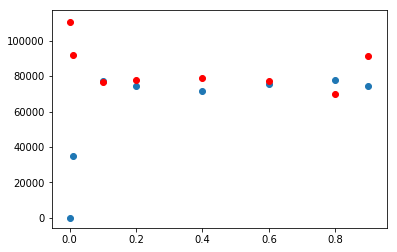

In [318]:
col1 = [x[0] for x in error_list]
col2 = [x[1] for x in error_list]
col3 = [x[2] for x in error_list]

# train error plot
plt.scatter(col1, col2)
# test error plot
plt.scatter(col1, col3, c = 'r')

In [319]:
error_list=[]
for size in train_size:

    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=size)
    x_train = x_train.reshape(-1,1)
    x_test = x_test.reshape(-1,1)
    y_train = y_train.reshape(-1,1)
    y_test = y_test.reshape(-1,1)
    
    model = Ridge().fit(x_train, y_train)
    
    train_error = mean_squared_error(y_train, model.predict(x_train))
    test_error = mean_squared_error(y_test, model.predict(x_test))

    error_list.append((size, train_error, test_error))

/Users/JiSunPark/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/JiSunPark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """
/Users/JiSunPark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/Users/JiSunPark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys
/Users/JiSunPark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .v

In [320]:
error_list

[(0.001, 0.0, 92797.340514246011),
 (0.01, 74818.042376855636, 79500.198682458707),
 (0.1, 77265.395634689106, 76371.039044974954),
 (0.2, 76695.430672119182, 75965.715491951574),
 (0.4, 78409.111254772535, 74728.874999943087),
 (0.6, 77281.46023990243, 74272.22718269848),
 (0.8, 77686.947438151648, 69650.852089102933),
 (0.9, 76064.893351844177, 75904.104421425742)]

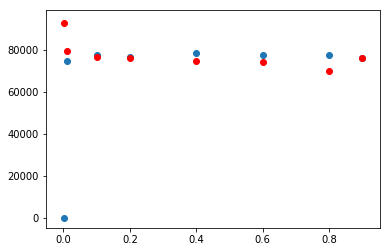

In [321]:
col1 = [x[0] for x in error_list]
col2 = [x[1] for x in error_list]
col3 = [x[2] for x in error_list]

# train error plot
plt.scatter(col1, col2)
# test error plot
plt.scatter(col1, col3, c = 'r')

## 4. Chose an ideal split size based on the previous plot for Ridge.
## Vary the Ridge parameter `alpha` from 0 to any value you'd like above 1. Plot the Train and Test error. Describe what you see based on the `alpha` parameter's stiffness.

In [361]:
alpha_values = [1, 10, 25, 50, 100, 200, 500, 1000, 2000, 5000, 6000, 7000, 8000, 9000, 10000]
error_list=[]

for av in alpha_values:

    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=.8)
    x_train = x_train.reshape(-1,1)
    x_test = x_test.reshape(-1,1)
    y_train = y_train.reshape(-1,1)
    y_test = y_test.reshape(-1,1)
    
    model = Ridge(alpha=av).fit(x_train, y_train)
    
    train_error = mean_squared_error(y_train, model.predict(x_train))
    test_error = mean_squared_error(y_test, model.predict(x_test))

    error_list.append((av, train_error, test_error))

/Users/JiSunPark/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/JiSunPark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys
/Users/JiSunPark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/Users/JiSunPark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':
/Users/JiSunPark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequen

In [362]:
error_list

[(1, 76030.80018439125, 76209.626454160825),
 (10, 77236.245103764042, 71867.751680586312),
 (25, 75024.972814121938, 80152.821496111661),
 (50, 76779.910622816387, 73275.999266285144),
 (100, 76274.108028797666, 75339.562317622243),
 (200, 73278.298864523429, 87237.795678571667),
 (500, 73993.317380054767, 84289.547286038462),
 (1000, 76289.397437526743, 75207.007895880655),
 (2000, 73478.681903881559, 86611.494514050748),
 (5000, 74949.707859753384, 81292.293593176713),
 (6000, 76819.179606494261, 73636.79206712218),
 (7000, 75855.440242545243, 78537.202675430817),
 (8000, 78045.194675927909, 69069.312849820781),
 (9000, 76000.95001685906, 77614.518865402119),
 (10000, 75050.235468209896, 82682.764648693308)]

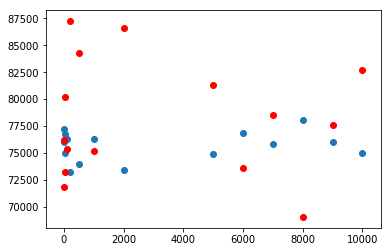

In [363]:
col1 = [x[0] for x in error_list]
col2 = [x[1] for x in error_list]
col3 = [x[2] for x in error_list]

# train error plot
plt.scatter(col1, col2)
# test error plot
plt.scatter(col1, col3, c = 'r')

Initially, the testing error is much higher than the training error. Eventually, as the alpha parameter continues to increase (becomes more stiff), both training error and testing error become closer together.

## Bonus. Either: Generate data  with a polynomial shape or use real data that you find on your own. Choose whatever regression model and process you'd like (Ridge, polynomial, etc.) and plot the Train-Test errors vs. any parameter your Model depends on (e.g. `alpha`, `degree`, etc.)

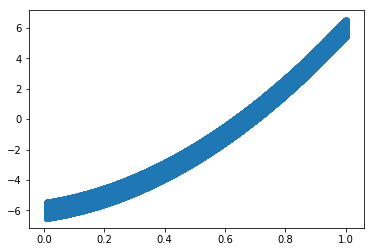

In [325]:
from sklearn.preprocessing import PolynomialFeatures

n1 = 500000
x1 = np.linspace(0.01, 1, n1).reshape(-1, 1)
y1 = (np.linspace(0.01, 3, n1) - 2) * (np.linspace(0.01, 3, n1) + 3) + np.random.rand(n1) - .5

plt.scatter(x1,y1)

In [326]:
x1_train, x1_test, y1_train, y1_test = train_test_split (x1, y1, train_size=.8)

/Users/JiSunPark/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [327]:
poly_list = [1, 2, 3, 4, 5, 10]
error_list = []
def transform(x):
    return poly.transform(x.reshape(-1, 1))

In [328]:
for p in poly_list:
    poly = PolynomialFeatures(degree=p)
    poly.fit(x1_train.reshape(-1,1))
    
    lin1 = LinearRegression().fit(transform(x1_train), y1_train.flatten())

    train_error = mean_squared_error(y1_train, lin1.predict((transform(x1_train))))
    test_error = mean_squared_error(y1_test, lin1.predict(transform(x1_test)))
    error_list.append((p, train_error, test_error))

In [329]:
error_list

[(1, 0.5270469313244277, 0.52686870467819957),
 (2, 0.083120715592435848, 0.083207622072440521),
 (3, 0.083120668539182513, 0.083207867508726191),
 (4, 0.08312065074928536, 0.083207898553794388),
 (5, 0.083120052204403203, 0.083208612502782192),
 (10, 0.083119698148003032, 0.083209992248451659)]

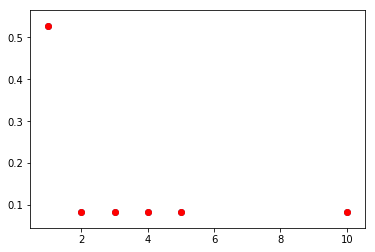

In [330]:
col1 = [x[0] for x in error_list]
col2 = [x[1] for x in error_list]
col3 = [x[2] for x in error_list]

# train error plot
plt.scatter(col1, col2)
# test error plot
plt.scatter(col1, col3, c = 'r')